# EPI2ME Labs Tutorial

This meta-tutorial aims to introduce some of the advantages of using the EPI2ME Labs notebook environment over a vanilla [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) notebook setup. We will walk through some of the unique features of the environment and how they can be leveraged to:

* create interactive data analyses
* simplify user interfaces
* and enhance code development

This tutorial does not aim to be a full introductory guide to JupyterLab notebooks (see <a href='#references'>References</a>), but by the end of this tutorial you should have the knowledge to make full use of EPI2ME Labs to create and share reproducible analyses.

This notebook has no special compute requirements.

## Introduction

EPI2ME Labs builds on JupyterLab to provide a working environment useful for common bioinformatic analyses. It is provided with "batteries included" for manipulating common bioinformatic file formats and Python modules for writing code.

### Included software

The notebook server of EPI2ME Labs is built from Docker container [templates](https://github.com/jupyter/docker-stacks) provided by the Jupyter project. The base Jupyter container uses [conda](https://docs.conda.io/en/latest/) to install its the Jupyter notebook server and its pre-requisites. EPI2ME Labs builds out the [base conda environment](https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html#managing-environments) with common bioinformatics commandline tools. At the time of writing (11/01/2021) these include:

|            |        ||                  |       ||            |        ||            |        |
|------------|--------||------------------|-------||------------|--------||------------|--------|
| blast      | 2.9.0  |\|| flye           | 2.8.1 |\|| miniasm  | 0.3    |\|| samtools | 1.10   |
| bedtools   | 2.29.2 |\|| guppy_barcoder | 4.2.2 |\|| mosdpeth | 0.2.9  |\|| seqkit   | 0.13.2 |
| bcftools   | 1.10.2 |\|| medaka         | 1.2.1 |\|| pomoxis  | 0.3.4  |\|| sniffles | 1.0.11 |
| centrifuge | 1.0.4  |\|| minimap2       | 2.17  |\|| racon    | 1.4.10 |\|| tabix    | 0.2.6  |

Most of these tools can be run simply and directly in a notebook, for example the environment includes the `samtools` suite of tools for handling BAM and SAM files:

In [8]:
!samtools index

Usage: samtools index [-bc] [-m INT] <in.bam> [out.index]
Options:
  -b       Generate BAI-format index for BAM files [default]
  -c       Generate CSI-format index for BAM files
  -m INT   Set minimum interval size for CSI indices to 2^INT [14]
  -@ INT   Sets the number of threads [none]


Here we have used the `!` command prefix to intruct Jupyter to interpret the following text as a Linux shell command rather than python code. The standard output (and error) of the samtools index command is shown as the cell output.

#### Commandline tools outside the base conda environment

Some tools are undesirable to install into the case conda environment. These have been instead installed into their own conda or [virtual environments](https://docs.python.org/3/tutorial/venv.html). And example of this is `medaka`, if we try to run medaka directly we find:

In [9]:
!medaka --help

/bin/bash: medaka: command not found


For these tools, EPI2ME Labs includes a helper `run` script to locate and activate the enviroment in which the tool resides. For example to run `medaka` successfully it is sufficient to invoke:

In [12]:
!run medaka --help

usage: medaka [-h] [--version]
              {compress_bam,features,train,consensus,smolecule,consensus_from_features,fastrle,stitch,variant,snp,tools}
              ...

optional arguments:
  -h, --help            show this help message and exit
  --version             show program's version number and exit

subcommands:
  valid commands

  {compress_bam,features,train,consensus,smolecule,consensus_from_features,fastrle,stitch,variant,snp,tools}
                        additional help
    compress_bam        Compress an alignment into RLE form.
    features            Create features for inference.
    train               Train a model from features.
    consensus           Run inference from a trained model and alignments.
    smolecule           Create consensus sequences from single-molecule reads.
    consensus_from_features
                        Run inference from a trained model on existing
                        features.
    fastrle             Create run-length encoded fas

The section <a href='#additional_software'>Installating Additional Software</a> has more information on how the `!run` command can be used with other software developers may wish to install into EPI2ME Labs.

### Included Python packages

To provide a useful starting point for Python development, EPI2ME Labs includes also a number of well-known Python packages pre-installed (as of 11/01/2021):

|            |        ||                  |          ||                  |          |
|------------|--------||------------------|----------||------------------|----------|
| bokeh      | 2.2.*  |\|| pyranges       | 0.0.76   |\|| seaborn        | 0.10.*   |
| ipywidgets | 7.5.*  |\|| pysam          | 0.16.0.1 |\|| xlrd           | 1.2.0    |
| matplotlib | 3.2.*  |\|| scikit-learn   | 0.23.*   |\||                |          |
| pandas     | 1.1.*  |\|| scipy          | 1.5.*    |\||                |          |

These tools are immediately available to the Python interpreted used for notebook execution, for example we can import [`pandas`](https://pandas.pydata.org/) and [`bokeh`](https://bokeh.org/) to start plotting data:

In [2]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
import numpy as np
import pandas as pd

output_notebook()
df = pd.DataFrame(
    np.random.randint(0,100, size=(100, 2)),
    columns=['x', 'y'])
df['color'] = np.random.choice(['red', 'blue'], size=100)
p = figure(height=200, width=400)
p.scatter('x', 'y', color='color', source=df)
show(p)

Loading BokehJS ...

Although it is perfectly legitimate to use any plotting library within Jupyter, EPI2ME Labs notebooks use the [`aplanat`](https://pypi.org/project/aplanat/) package which acts as a convenience layer over `bokeh` to provide consistent styling and an unfussy, direct plotting interfact for developers. See the <a href='#aplanat'>Plotting with aplanat</a> section below for more details.

<a id='additional_software'></a>

### Installing additional software

While the pre-installed software in EPI2ME Labs should be sufficient for many notebook workflows, it may be desirable to install additional software. Software can be installed into either the base environment or a new conda environment. In the following sections we will discuss the benefits of each and how to choose which method to use

***Software installed into the EPI2ME Labs environment is not persistent across restarts of the EPI2ME Labs server. This can be both useful and a hinderance. If there is software that you would like to see preinstalled into the environment, please create an issue on the [Tutorials](https://github.com/epi2me-labs/tutorials) project on Github.***

#### Installing software into the base environment

For the most part it should be possible to install software directly into the [base conda environment](https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html#managing-environments) hosting the preinstalled software. This is the simplest method and allows all software to be immediately available. If a piece of software has dependencies that conflict with other installed software the alternative method in the following section can be used.

In order to install software we recommend developers use [mamba](https://github.com/mamba-org/mamba), a fast reimplementation of the `conda` package manager. The `mamba` command is a drop-in replacement for conda. The following will install [Rebaler](https://github.com/rrwick/Rebaler) into the base conda environment:

In [ ]:
!mamba install -q -y rebaler

In addition to installing new programs, we can also use mamba to install python packages to be used within notebook code. For example the following code cell **will fail**:

In [19]:
import snakemake

ModuleNotFoundError: No module named 'snakemake'

as snakemake is not installed into EPI2ME Labs by default. We can install it,

In [26]:
!mamba install -q -y snakemake-minimal

after which the import works:

In [25]:
import snakemake
print(snakemake.__version__)

5.31.1


#### Installing software into a new environment

Occasionally it may not be possible to install software into the base EPI2ME Labs environment. This can happen when a new piece of software (or its dependencies) conflict with software that is already installed. When attempting to install such software either the install will fail completely or change the software installed in the base environment so radically that EPI2ME Labs is not guaranteed to work correctly.

The resolution to the above issue is to install software into a distinct conda environment.

***This method is not applicable to Python packages that are to be imported and used within the notebook, only software that is used with a command-line interface.***

To install software into a distinct environment, simply create a new environment following the usual procedure:

In [ ]:
!mamba create -y -n my_environment porechop

Here we have created a new conda environment named `my_environment` and installed [`porechop`](https://github.com/rrwick/Porechop) into it. To use porechop we can use the `!run` command:

In [37]:
!run porechop

usage: porechop -i INPUT [-o OUTPUT]
                [--format {auto,fasta,fastq,fasta.gz,fastq.gz}] [-v VERBOSITY]
                [-t THREADS] [-b BARCODE_DIR]
                [--barcode_threshold BARCODE_THRESHOLD]
                [--barcode_diff BARCODE_DIFF] [--require_two_barcodes]
                [--untrimmed] [--discard_unassigned]
                [--adapter_threshold ADAPTER_THRESHOLD]
                [--check_reads CHECK_READS] [--scoring_scheme SCORING_SCHEME]
                [--end_size END_SIZE] [--min_trim_size MIN_TRIM_SIZE]
                [--extra_end_trim EXTRA_END_TRIM]
                [--end_threshold END_THRESHOLD] [--no_split]
                [--discard_middle] [--middle_threshold MIDDLE_THRESHOLD]
                [--extra_middle_trim_good_side EXTRA_MIDDLE_TRIM_GOOD_SIDE]
                [--extra_middle_trim_bad_side EXTRA_MIDDLE_TRIM_BAD_SIDE]
                [--min_split_read_size MIN_SPLIT_READ_SIZE] [-h] [--version]
porechop: error: the following arguments ar

It is possible if required, to run commands within the new conda environment. This does require jumping through a small hoop however. The below recipe can be used to run arbitrary commands in a conda environment:

In [38]:
!. /opt/conda/etc/profile.d/conda.sh \
    && conda activate my_environment \
    && pip install cowsay

Here we have installed the Python implementation of the classic `cowsay` program into the `my_environment` environment created above. We can see that this is not installed in the base environment from the following:

In [41]:
!cowsay

/bin/bash: cowsay: command not found


But as before, we can run the program using the `!run` helper:

In [42]:
!run cowsay Moo!

  ____
< Moo! >
  ====
         \
          \
            ^__^                             
            (oo)\_______                   
            (__)\       )\/\             
                ||----w |           
                ||     ||  
                
                


<a id='#extensions'></a>

## JupyterLab Extensions

To enhance the default JupyterLab experience, a small set of extensions have been included. For example you may have noticed our spiffing theme, which is based on the [Mexico theme](https://github.com/arbennett/jupyterlab-themes).

### Cell play button

Toward the right-hand side of cells in EPI2ME Labs we have placed a `Play` button:



This allows users to execute a cell with moving the mouse cursor away from the cell to the top of the screen, or using keyboard shortcuts.

### Code folding and hiding

JupyterLabs contains functionality to hide the contents of code cells by double clicking the blue rectangle to the left of the cell. For example the contents of the code cell below should be initially hidden and replace with `...`:

In [ ]:
print ("This code is hidden from the user")

The code can be revealed by clicking on `...`.

For notebooks of modest complexity these `...` can become lost to the user and do not convey any information regarding the cell's contents. To improve this situation EPI2ME Labs allows to collapse a cell's contents except for a prelimary comment line:

In [ ]:
# this cell contains code that prints a message
print("Hello world")

The functionality is activate by clicking the grey box to the left of the cell. Naturally this behaviour is valid only for code cells containing an initial comment line.

### Autorunning code cells

In is often required that to be useable to end users notebooks require some setup code to be run. A casual user may miss these cells and consequently the notebook fail to run subsequent code correctly. For this situation we EPI2ME Labs has functionality to automatically execute code cells when a notebook is initially opened.

To set a code cell to run automatically, right-click on the cell a select `Toggle autorun cell at launch`:

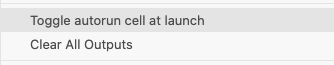

When active a purple dot  will be displayed in the top right-hand side of the cell.

***This functionality should be used sparingly, it was developed in order to allow automatic initialisation of Jupyter Widgets (see <a href='#user-interfaces'>Creating user interfaces</a>)***

<a id='user-interfaces'></a>

## Creating user interfaces

EPI2ME Labs contains the [`Jupyter Widgets`](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html) python module in order to contruct user interfaces which do not rely on editing code to provide inputs.

### Standard Jupyter Widgets

These can be imported and used directly, as in the [documentation](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Basics.html):

In [63]:
import ipywidgets as widgets
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [73]:
print("The current value is: ", w.value)

The current value is:  46


### Form creation API

The [`epi2melabs`](https://pypi.org/project/epi2melabs/) Python module provides a template to construct rapidly complete forms with a consistent presentation:

In [64]:
import os
from epi2melabs.notebook import InputForm, InputSpec

form = InputForm(
    InputSpec(
        "item_a", "Item A", 10),
    InputSpec(
        "item_b", "Item B", (0,10), long_desc="I am the description for Item B"),
    InputSpec(
        "item_c", "Item C", 10, validator=lambda x: x<11),
    InputSpec(
        "item_d", "Item D", "Value of D", validator=lambda x: os.path.isfile(x),
        err_msg="'{value}' is not a valid file for '{param}'.")
)
form.display()

Each `InputSpec` comprises three items:
* a name (to be used in code)
* a short description (show in the form)
* a widget specification. This can be anything that can be accepted by [`ipywidgets.interact`](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html#Basic-interact) or an explicit widget.

The current values of the inputs are available as attributes of the form instance:

In [99]:
form.item_a, form.item_d

(10, 'Value of D')

A summary report can be generated directly from the object:

In [101]:
print(form.report())

Item A: 10
Item B: 5
Item C: 10
Item D: Value of D
 - 'Value of D' is not a valid file for 'Item D'.
One or more values failed validation.


This report contains a summary of invalid values according to the validation functions given; these information is available from the `.validate` method:

In [97]:
form.validate()

(False, ["'Value of D' is not a valid file for 'Item D'."])

The system allows us to keep all the logic for accepting and checking inputs in once place.

#### Best practices for form elements

We recommend to apply two settings to forms to enhance the notebook experience for end users:

 1. Collapse the codecell containing the form contruction code by double-clicking the blue vertical bar to its left, to leave just the `...` hint.
 2. Set the codecell to autorun when a notebook is opened such that the widget will render for the user immediately and default values are populated.
 
See the <a href='#extensions'>JupyterLab Extensions</a> section for more information on these behaviours.

#### Advanced actions

Commonly we might want to provide more advanced actions and code to trigger from a form. This can be done through use of a Button:

In [124]:
cpuinfo = None
def process_form(inputs):
    global cpuinfo
    with open(inputs.input_file, 'r') as fh:
        cpuinfo = list()
        cur = dict()
        for line in fh.readlines():
            if line == "\n":
                cpuinfo.append(cur)
                cur = dict()
            else:
                key, value = line.split(":")
                key = key.strip()
                value = value.lstrip().strip()
                cur[key] = value
        cpuinfo.append(cur)
    print("Finished processing file")
    
inputs = InputForm(
    InputSpec('input_file', 'A file', '/proc/cpuinfo'),)
inputs.add_process_button(process_form)
inputs.display()

The form above will populate the global `cpuinfo` variable with details from the input file. Here we just show the number found:

In [123]:
print("Number of CPUs:", len(cpuinfo))

Number of CPUs: 5


<a href='#aplanat'></a>

## Plotting with aplanat

In the previous sections we have listed the common pre-installed software that is available within EPI2ME Labs for creating charts and reporting results. In this section we introduce [`aplanat`](https://pypi.org/project/aplanat/), a Python library built on top of the popular [bokeh](https://bokeh.org/) charting library. `aplanat` was designed to simplify the use of bokeh to create interactive plots, particularly in a notebook setting.

### Design philosophy

`aplanat` attempts to make constructing common plots as simple as possible by translating directly a users inputs into displayed data. Most plotting functions are of the form:

    plot = plot_function(
        [series_1_x, series_2_x, ...], [series_1_y, series_2_y, ...],
        name=[series_1_name, series_2_name, ...],
        colors=[series_1_color, series_1_color, ...])
        
Data is provided to aplanat in a lowest-common-denominator fashion: as lists of vectors. This is distinct from other plotting libraries that rely on values being presented in specific data-structures.

### Simple examples

To give an overview of `aplanat` let's start by sampling data from the normal distribution:

In [54]:
import numpy as np

x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

It is simple to create a scatter plot of these data:

In [60]:
import aplanat
from aplanat import points

plot_1 = points.points([x], [y], x_axis_label='x', y_axis_label='y')
aplanat.show(plot_1, background="#f4f4f4")

Note of the `x-` and `y-`values are given within lists, this is because the arguments are lists of potentially more data series. For example to plot both `y` against `x`, and `x` against `y`:

In [68]:
plot_2 = points.points(
    [x, y], [y, x],
    names=['y on the y-axis', 'x on the y-axis'],
    colors=['red', 'blue'],
    x_axis_label='item 1', y_axis_label='item 2',
    height=300, width=400)
aplanat.show(plot_2, background="#f4f4f4")

In creating the plots above, `aplanat` has applied sensible default attributes to the plots and taken care of some bokeh boilerplate necessaries that the developer would otherwise have to include. These include:

* instructing bokeh to generate output for notebooks (not javascript, or static images)
* set sensible plot limits, both for the initial view and panning (panning will not move outside the area where data reside)
* set a useful default plot size
* ensure a legend is plotting if series names are given

In addition, note that the `show()` function accepts a `background` argument. This sets the colour of all background elements of the plot, here to the colour of the notebook cell output background.

For other plot types, developers are encouraged to peruse the [source code](https://github.com/epi2me-labs/aplanat), or review use cases presented in EPI2ME Labs notebooks. We don't currently have automatically generated documentation.

### Infographics

Included in `aplanat` is the ability to create "infographics". These can be used to highlight key performance metrics in notebooks and reports:

In [76]:
from aplanat import graphics

summary = graphics.InfoGraphItems()
summary.append(label='Total reads', value=1000000, icon='angle-up', unit='')
summary.append('Total yield', 1e9, 'signal', 'b')
summary.append('Mean read length', 50e3, 'align-center', 'b')
summary.append('Mean qscore (pass)', '14', 'thumbs-up')
plot = graphics.infographic(summary.values())
aplanat.show(plot, background='#f4f4f4')

The code above constructs an instance of an `InfoGraphItems` helper class. Each item added requires a `label`, `value`, `icon`, and optionally `unit`. Each of these should be self-explanatory. Numbers passed to the infographic are formatted using SI suffixes (`k`, `M`, `G` etc.) with the provided `unit`. To avoid any conversion developers can pass values of `str` type. Specification of the displayed icon is via the name of a [font-awesome](https://fontawesome.com/) glyph (version 5.13.1).

### Facetted plots

Most plotting functions within aplanat follow the "list of vectors" approach illustrated above. Although simple, this is not to everyone's taste. A particularly common plot to want to produce is a facet (or trellis) plot, displaying up to five dimensions of data. For this `aplanat` includes the `facet_grid()` function which accepts a structure array or pandas dataframe and a specification of columns names to plotting co-ordinates.

In [86]:
# Code to generate a facet plot
import pandas as pd

from aplanat import show
from aplanat.layouts import facet_grid
from aplanat.points import points

df = pd.DataFrame({
    'ear_size': np.random.normal(size=1000),
    'paw_size': np.random.normal(size=1000),
    'animal': np.random.choice(['cat', 'dog'], size=1000),
    'size': np.random.choice(['big', 'small'], size=1000),
    'nature': np.random.choice(['docile', 'fierce'], size=1000)})

# plot the data facets
p = facet_grid(
    df, {'x':'ear_size', 'y':'paw_size', 'col':'animal'},
    points, facet=('animal', 'nature'), height=200, width=200,
    x_axis_label='ear_size', y_axis_label='paw_size',
    x_facet_heading='animal', y_facet_heading='nature')
# show the plot
show(p, background="#f4f4f4")

### Creating standalone reports

Interactive notebooks are great, but sometimes it is desirable to create a report for posterity. It is possible to simply export a notebook to any number of formats from the `>File` menu of the EPI2ME Labs interface:

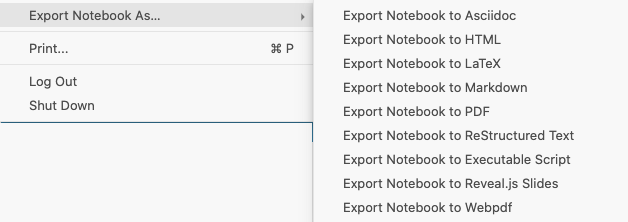

The result however is often filled with code when all we really want is a document containing tables and graphs displaying our data. `aplanat` makes this possible through its `report` API:

In [116]:
from aplanat import report

summary = report.HTMLReport(
    title="My report", lead="An exciting summary of results")
summary.markdown("This is the introduction section of my report.")
section_1 = summary.add_section('section_1')
section_2 = summary.add_section('section_2')

The above code creates a report with a title and lead statement, adds an introductory comment, and adds two sections to the report. Sections can be used to logically groups items together but otherwise serve no functional purpose. To add a plot to a section (or the main report), simply call the `.plot()` method with a bokeh `Figure` instance:

In [117]:
import numpy as np
from aplanat import points, hist

x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

plot_0 = hist.histogram([x, y], colors=['red', 'blue'])
summary.plot(plot_0)

plot_1 = points.points([x], [y])
section_1.plot(plot_1)

plot_2 = points.points([x, y], [y, x], colors=['red', 'blue'])
section_2.plot(plot_2)

`pandas` dataframes can be added directly to reports as a formatted table using the `.table()` method:

In [118]:
import pandas as pd

df = pd.DataFrame({'x':x, 'y':y})
section_1.table(df)

It is also possible to add text commentary using markdown syntax:

In [119]:
section_2.markdown("""
# Section 2

This is the start of section 2.
""")

The report can be saved as a self-contained HTML document using the `.write()` method:

In [120]:
summary.write("my_report.html")

#### Structuring report elements

In the above example we added report elements to report sections in an "in order" style: the report elements will appear in the report in the chronological order in which the code adding the elements was executed. Using report sections provides one method to control the order of elements. Another method is to use placeholder items:

In [121]:
summary.placeholder('intro')
summary.markdown('This text was added after the placeholder was inserted.')
summary.markdown('This text was given to the placeholder.', key='intro')

Here we have constructed a named placeholder, before adding a markdown element. The placeholder is then filled with a markdown element by providing the `key` option to the `.markdown()` method.

Placeholders allow us to define the structure of a report ahead of time before any explicit report items are available; this can be useful in the context of writing fluent code in a notebook setting.

The placeholder functionality is possible as all form elements are given a unique key. Elements are assigned random keys by default but the `.plot()`, `.table()`, and `.markdown()` methods can all be passed an optional `key` argument. If it is required to replace a form element it is possible to add an element with the same key as a previously added item:

In [122]:
summary.markdown('This text will not be display in the final report', key='replaced')
summary.markdown('This text will be displayed.', key='replaced')

When initially creating a report it is possible to declare that all added items must be given an explicit key through the `require_keys` argument:

In [24]:
report_requiring_keys = report.HTMLReport(require_keys=True)

## Feedback

Finally, EPI2ME Labs is a continually evolving product. If you have feedback or would like to suggest a feature, enhancement, or improvement for EPI2ME Labs please create an issue on the [Tutorials](https://github.com/epi2me-labs/tutorials) project on Github.

<a id='references'></a>

## References

* [JupyterLab Overview](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html)
* ipython [widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Basics.html):
* [Bokeh](https://bokeh.org/)
* EPI2ME Labs code [repository](https://github.com/epi2me-labs)
* Managing conda [environments](https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html#managing-environments)